In [139]:
from scipy.io import loadmat
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [140]:
def load_var_from_mat(mat_file_name, varname):
    try:
        data = loadmat(mat_file_name)
        var = data[varname]
    except:
        data = h5py.File(mat_file_name, 'r')
        var = data[varname][()]
    return var

In [141]:
pth_mat = r'\\10.162.80.16\Andre_expansion\data\monkey_fetus\Stardist\StarDist_12_25_23\volcell_super_good_version\kidney_files\kidney_table.mat'
data_raw = load_var_from_mat(pth_mat, 'kidney_table')

In [142]:
colnames = ['reg_centroid_x',
'reg_centroid_y',
'Centroid_x',
'Centroid_y',
'Area',
'Perimeter',
'Circularity',
'Aspect Ratio',
'compactness',
'eccentricity',
'extent',
'form_factor',
'maximum_radius',
'mean_radius',
'median_radius',
'minor_axis_length',
'major_axis_length',
'orientation_degrees',
'r_mean_intensity_norm',
'g_mean_intensity_norm',
'b_mean_intensity_norm',
'slide_num',
'class']

In [143]:
#df = pd.DataFrame(np.transpose(data_raw), columns=colnames)
df = pd.DataFrame(data_raw, columns=colnames)

In [144]:
df.head()

,reg_centroid_x,reg_centroid_y,Centroid_x,Centroid_y,Area,Perimeter,Circularity,Aspect Ratio,compactness,eccentricity,...,mean_radius,median_radius,minor_axis_length,major_axis_length,orientation_degrees,r_mean_intensity_norm,g_mean_intensity_norm,b_mean_intensity_norm,slide_num,class
0,3256.936523,890.083008,30234.0,10916.0,222.666565,55.239559,0.916990,1.506422,13.703938,0.747888,...,8.329117,8.301506,13.838544,20.846684,5316.177734,0.367094,-0.426107,0.085461,411.0,50.0
1,3260.030029,885.132324,30260.0,10874.0,146.660278,48.798027,0.773959,1.911491,16.236485,0.852240,...,6.643690,6.212703,10.255371,19.603052,6834.945801,0.148341,-0.429429,-0.103288,411.0,50.0
2,3267.901855,883.669800,30320.0,10868.0,179.274673,49.774612,0.909312,1.460755,13.819643,0.728940,...,7.373103,6.531409,12.651336,18.480507,6962.200684,0.891346,0.272807,0.780094,411.0,50.0
3,3262.425293,891.045532,30276.0,10930.0,199.767776,53.585377,0.874264,1.653303,14.373653,0.796339,...,7.794395,7.516311,12.586496,20.809286,6772.403809,-0.685936,-1.198102,-0.719357,411.0,50.0
4,3262.646973,887.552856,30278.0,10898.0,281.642059,60.976879,0.951868,1.269267,13.201793,0.615859,...,9.444873,9.480962,16.912075,21.465935,6715.286133,0.223773,-0.493208,-0.070712,411.0,50.0


In [145]:
good_names = ['Area (um)', 'Perimeter (um)', 'Circularity', 'Aspect Ratio', 'Compactness',
       'Eccentricity', 'Extent', 'Form Factor', 'Maximum Radius (um)',
       'Mean Radius (um)', 'Minor Axis Length (um)', 'Major Axis Length (um)',
       'Normalized Mean R Intensity', 'Normalized Mean G Intensity',
       'Normalized Mean B Intensity']

In [146]:
cols_to_select = ['Area', 'Perimeter', 'Circularity', 'Aspect Ratio', 'compactness',
       'eccentricity', 'extent', 'form_factor', 'maximum_radius',
       'mean_radius', 'minor_axis_length', 'major_axis_length',
       'r_mean_intensity_norm', 'g_mean_intensity_norm',
       'b_mean_intensity_norm']

In [147]:
#df_sample = df.sample(frac=.05).reset_index(drop=True)
df_sample = df

x = df_sample.loc[:,cols_to_select]
y = df_sample.loc[:,'class']

cols = df_sample.columns

def z_score_normalize(col):
    return (col - col.mean()) / col.std()

num_cols = len(cols)

# Normalize all columns except the last three
#x.iloc[:, :-3] = x.iloc[:, :-3].apply(z_score_normalize, axis=0)

In [148]:
x.head()

,Area,Perimeter,Circularity,Aspect Ratio,compactness,eccentricity,extent,form_factor,maximum_radius,mean_radius,minor_axis_length,major_axis_length,r_mean_intensity_norm,g_mean_intensity_norm,b_mean_intensity_norm
0,222.666565,55.239559,0.916990,1.506422,13.703938,0.747888,0.771841,1.090525,10.787011,8.329117,13.838544,20.846684,0.367094,-0.426107,0.085461
1,146.660278,48.798027,0.773959,1.911491,16.236485,0.852240,0.729520,1.292058,10.667542,6.643690,10.255371,19.603052,0.148341,-0.429429,-0.103288
2,179.274673,49.774612,0.909312,1.460755,13.819643,0.728940,0.766776,1.099732,12.132370,7.373103,12.651336,18.480507,0.891346,0.272807,0.780094
3,199.767776,53.585377,0.874264,1.653303,14.373653,0.796339,0.762717,1.143819,12.435106,7.794395,12.586496,20.809286,-0.685936,-1.198102,-0.719357
4,281.642059,60.976879,0.951868,1.269267,13.201793,0.615859,0.775802,1.050565,11.529201,9.444873,16.912075,21.465935,0.223773,-0.493208,-0.070712


In [149]:
dat = x.copy()
dat.insert(0,"class",y,True)

In [154]:
dat.head()

,class,Area,Perimeter,Circularity,Aspect Ratio,compactness,eccentricity,extent,form_factor,maximum_radius,mean_radius,minor_axis_length,major_axis_length,r_mean_intensity_norm,g_mean_intensity_norm,b_mean_intensity_norm
0,50.0,63.028355,15.636198,0.916990,1.506422,13.703938,0.747888,0.771841,1.090525,3.053389,2.357653,3.917160,5.900896,0.367094,-0.426107,0.085461
1,50.0,41.513893,13.812847,0.773959,1.911491,16.236485,0.852240,0.729520,1.292058,3.019571,1.880574,2.902902,5.548871,0.148341,-0.429429,-0.103288
2,50.0,50.745777,14.089281,0.909312,1.460755,13.819643,0.728940,0.766776,1.099732,3.434208,2.087042,3.581107,5.231122,0.891346,0.272807,0.780094
3,50.0,56.546585,15.167962,0.874264,1.653303,14.373653,0.796339,0.762717,1.143819,3.519901,2.206294,3.562754,5.890310,-0.685936,-1.198102,-0.719357
4,50.0,79.722054,17.260212,0.951868,1.269267,13.201793,0.615859,0.775802,1.050565,3.263474,2.673481,4.787159,6.076182,0.223773,-0.493208,-0.070712


In [151]:
ds = 0.4416/0.5*4

dat['Area'] = dat['Area']/ds
dat['Perimeter'] = dat['Perimeter']/ds
dat['maximum_radius'] = dat['maximum_radius']/ds
dat['mean_radius'] = dat['mean_radius']/ds
dat['minor_axis_length'] = dat['minor_axis_length']/ds
dat['major_axis_length'] = dat['major_axis_length']/ds

dat.head()

,class,Area,Perimeter,Circularity,Aspect Ratio,compactness,eccentricity,extent,form_factor,maximum_radius,mean_radius,minor_axis_length,major_axis_length,r_mean_intensity_norm,g_mean_intensity_norm,b_mean_intensity_norm
0,50.0,63.028355,15.636198,0.916990,1.506422,13.703938,0.747888,0.771841,1.090525,3.053389,2.357653,3.917160,5.900896,0.367094,-0.426107,0.085461
1,50.0,41.513893,13.812847,0.773959,1.911491,16.236485,0.852240,0.729520,1.292058,3.019571,1.880574,2.902902,5.548871,0.148341,-0.429429,-0.103288
2,50.0,50.745777,14.089281,0.909312,1.460755,13.819643,0.728940,0.766776,1.099732,3.434208,2.087042,3.581107,5.231122,0.891346,0.272807,0.780094
3,50.0,56.546585,15.167962,0.874264,1.653303,14.373653,0.796339,0.762717,1.143819,3.519901,2.206294,3.562754,5.890310,-0.685936,-1.198102,-0.719357
4,50.0,79.722054,17.260212,0.951868,1.269267,13.201793,0.615859,0.775802,1.050565,3.263474,2.673481,4.787159,6.076182,0.223773,-0.493208,-0.070712


In [155]:
cmap = [[235, 212, 200],
        [137, 151, 206],
        [165, 155, 161],
        [205, 175, 220]]

cmap = [[r/255, g/255, b/255] for r, g, b in cmap]

titles = ["Endothelial", "Ureteric Tree", "Renal Vesicle", "Renal Stroma"]

C:\Users\Donald\AppData\Local\Temp\ipykernel_55868\2757055051.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['', '', '', ''])


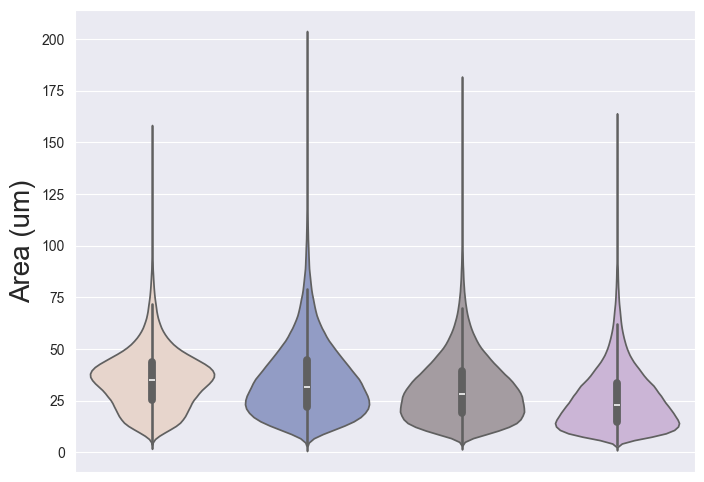

In [156]:
i=0

fig, ax = plt.subplots(figsize=(8, 6))
sns.violinplot(x="class", y=f"{cols_to_select[i]}", data=dat, hue='class',palette=cmap)
plt.legend().remove()
ax.set_xticklabels(['', '', '', ''])
ax.set_xlabel('')
ax.set_ylabel(f'{good_names[i]}', fontsize=20)
plt.savefig(fr'C:\Users\Donald\PycharmProjects\monkey_nuc_segment\Segmentation_Analysis\monkey\stardist_volcell\plots\kidney_nuc_feature_violins\{col}_plot.png', dpi=300)
# plt.close()  # Close the current figure to free up memory
plt.show()

In [157]:
dat.columns

Index(['class', 'Area', 'Perimeter', 'Circularity', 'Aspect Ratio',
       'compactness', 'eccentricity', 'extent', 'form_factor',
       'maximum_radius', 'mean_radius', 'minor_axis_length',
       'major_axis_length', 'r_mean_intensity_norm', 'g_mean_intensity_norm',
       'b_mean_intensity_norm'],
      dtype='object')

In [158]:
cols_to_select

['Area',
 'Perimeter',
 'Circularity',
 'Aspect Ratio',
 'compactness',
 'eccentricity',
 'extent',
 'form_factor',
 'maximum_radius',
 'mean_radius',
 'minor_axis_length',
 'major_axis_length',
 'r_mean_intensity_norm',
 'g_mean_intensity_norm',
 'b_mean_intensity_norm']

C:\Users\Donald\AppData\Local\Temp\ipykernel_55868\2726964597.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['', '', '', ''])


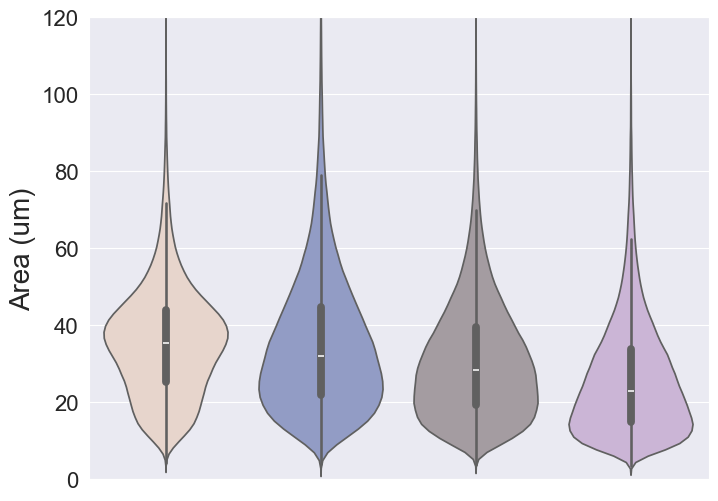

In [162]:
for i,col in enumerate(dat.columns):
    if col == 'class':
        continue
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.violinplot(x="class", y=f"{cols_to_select[i-1]}", data=dat, hue='class',palette=cmap)
    plt.legend().remove()
    ax.set_xticklabels(['', '', '', ''])
    ax.set_xlabel('')
    ax.set_ylabel(f'{good_names[i-1]}', fontsize=20)
    plt.yticks(fontsize=16)
    #ax.set_ylim(0, 120)
    plt.savefig(fr'C:\Users\Donald\PycharmProjects\monkey_nuc_segment\Segmentation_Analysis\monkey\stardist_volcell\plots\kidney_nuc_feature_violins\{col}_plot.png', dpi=300)
    plt.show()
    # plt.close()  # Close the current figure to free up memory
    break

In [ ]:
df_good = dat.copy()

In [ ]:
df_sample = df_good.sample(frac=.05).reset_index(drop=True)
x2 = df_sample.iloc[:,1:-1]
y2 = df_sample.iloc[:,0]

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
df_sample2 = x2
pca2=PCA()
pca2.fit(x2)
pca2.explained_variance_ratio_

In [ ]:
df_sample2.head()

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(range(0,len(df_sample2.columns)), pca2.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')

In [ ]:
pca = PCA(n_components=2)
pca.fit(x2)
pca.transform(x2)
scores_pca = pca.transform(x2)

In [ ]:
color_dict = dict(zip(np.unique(y), cmap))
colors = [color_dict[value] for value in y2]

In [ ]:
color_dict

In [ ]:
# Plot the transformed data (principal components)
plt.figure(figsize=(8, 6))
plt.scatter(scores_pca[:, 0], scores_pca[:, 1], color=colors, label='Principal Components', s=5)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
#plt.savefig(fr'C:\Users\Donald\PycharmProjects\monkey_nuc_segment\Segmentation_Analysis\monkey\stardist_volcell\plots\pdfs\pca_plot.png', dpi=300)  # Save the plot as a PDF file
plt.show()